In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
🚨 Accident Detected! Frame: frame_150.jpg (Confidence: 0.920)


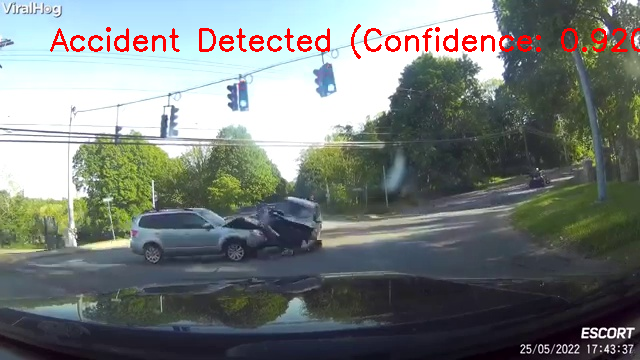

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
🚨 Accident Detected! Frame: frame_180.jpg (Confidence: 0.889)


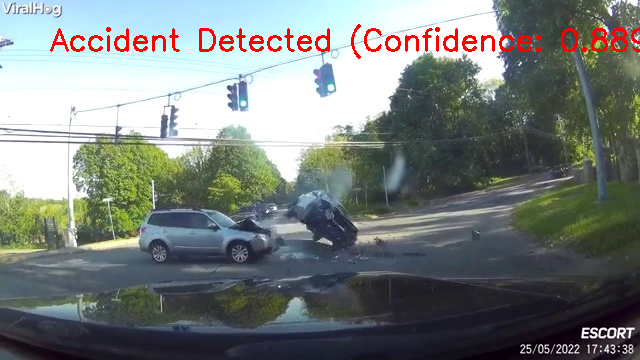

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
🚨 Accident Detected! Frame: frame_210.jpg (Confidence: 0.866)


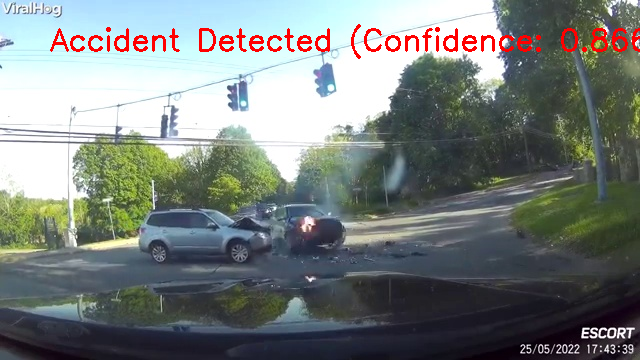

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🚨 Accident Detected! Frame: frame_240.jpg (Confidence: 0.953)


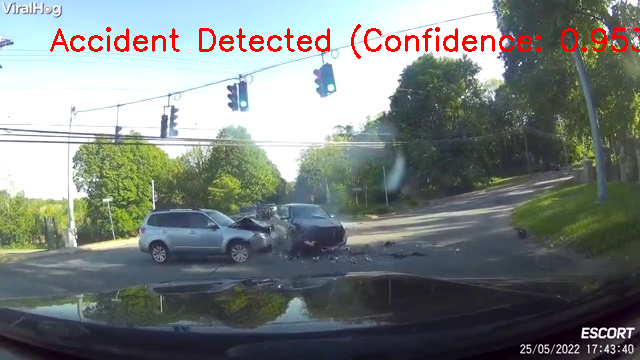

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
🚨 Accident Detected! Frame: frame_270.jpg (Confidence: 0.955)


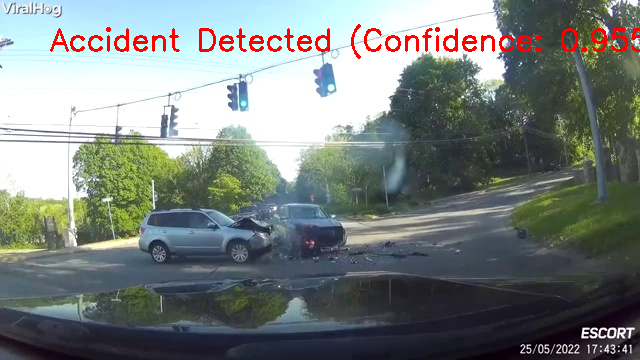

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
🚨 Accident Detected! Frame: frame_300.jpg (Confidence: 0.947)


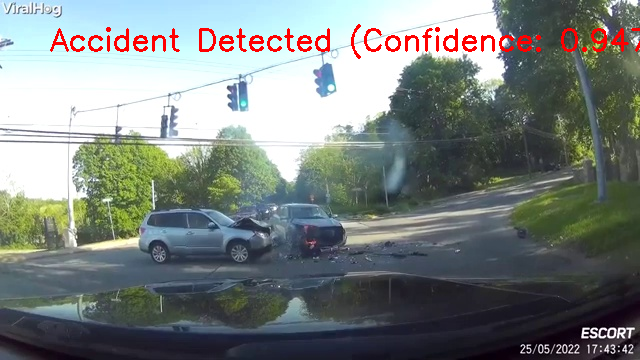

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
🚨 Accident Detected! Frame: frame_330.jpg (Confidence: 0.959)


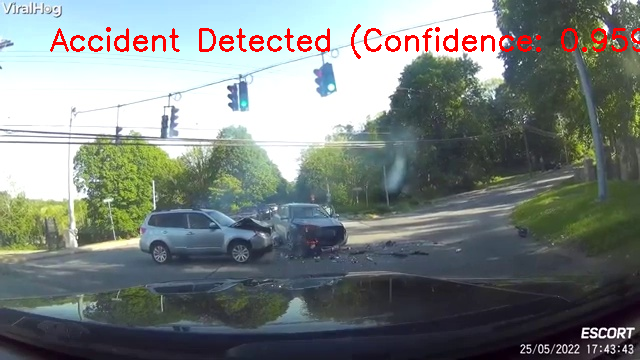

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
🚨 Accident Detected! Frame: frame_360.jpg (Confidence: 0.915)


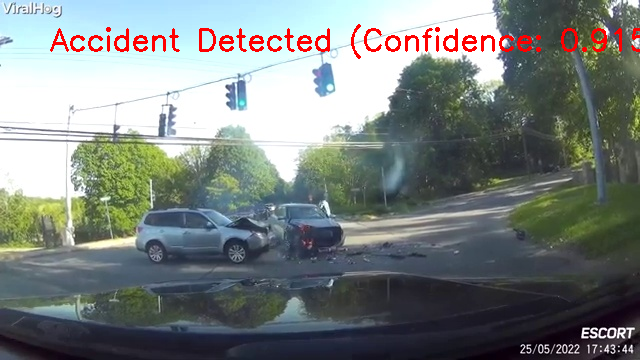

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
🚨 Accident Detected! Frame: frame_390.jpg (Confidence: 0.953)


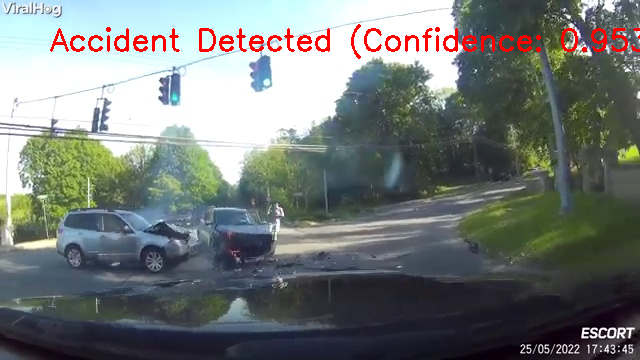

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
🚨 Accident Detected! Frame: frame_420.jpg (Confidence: 0.945)


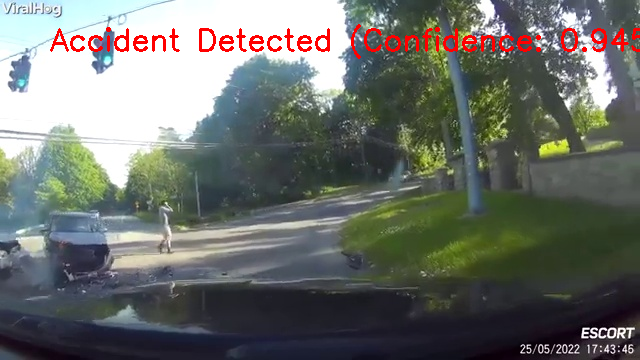

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
🚨 Accident Detected! Frame: frame_480.jpg (Confidence: 0.962)


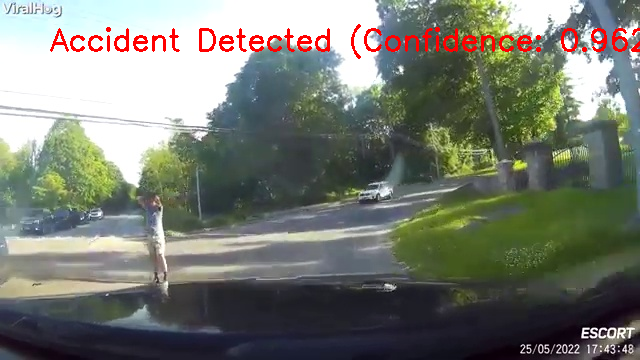

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
🚨 Accident Detected! Frame: frame_510.jpg (Confidence: 0.868)


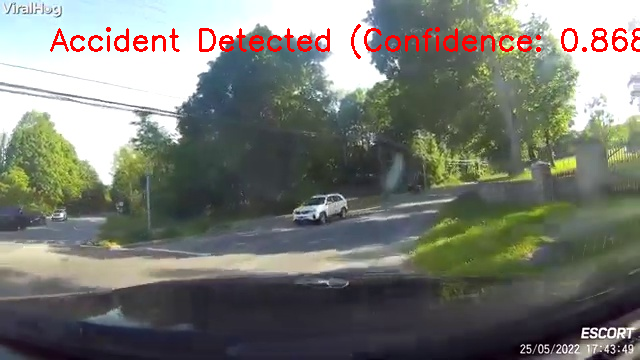

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

✅ Processing completed.


In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Load the trained CNN accident detection model
cnn_model_path = "/content/drive/MyDrive/accident_detection_model.h5"  # Replace with your actual model
cnn_model = load_model(cnn_model_path)

# Path to the video file
video_path = "/content/drive/MyDrive/Accident sample video 3.mp4"

# Create a folder to store frames
output_folder = "processed_frames1"
os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get frames per second
frame_interval = fps  # 1 frame per second

frame_count = 0
last_accident_frame = None
last_accident_confidence = 0.0

def preprocess_image(image_path):
    """Prepares an image for CNN model prediction"""
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust size as per your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    return img_array

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break  # Exit loop if video ends

    if frame_count % frame_interval == 0:
        # Save the frame temporarily
        frame_filename = f"frame_{frame_count}.jpg"
        frame_path = os.path.join(output_folder, frame_filename)
        cv2.imwrite(frame_path, frame)

        # Step 1: Classify the frame using CNN model
        img_array = preprocess_image(frame_path)
        prediction = cnn_model.predict(img_array)
        accident_prob = prediction[0][0]  # Adjust index based on your model output

        if accident_prob >= 0.8:  # Only display accidents with confidence > 0.81
            print(f"🚨 Accident Detected! Frame: {frame_filename} (Confidence: {accident_prob:.3f})")

            # Store the last accident-detected frame
            last_accident_frame = frame_path
            last_accident_confidence = accident_prob

            # Display the accident frame with confidence score
            accident_frame = cv2.imread(last_accident_frame)
            cv2.putText(accident_frame, f"Accident Detected (Confidence: {last_accident_confidence:.3f})",
                        (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            # ✅ Use cv2_imshow() instead of cv2.imshow() for Google Colab
            cv2_imshow(accident_frame)

    frame_count += 1

cap.release()
print("\n✅ Processing completed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🚨 Accident Detected! Frame: frame_150.jpg (Confidence: 0.92)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🚨 Accident Detected! Frame: frame_180.jpg (Confidence: 0.89)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🚨 Accident Detected! Frame: frame_210.jpg (Confidence: 0.87)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🚨 Accident Detected! Frame: frame_240.jpg (Confidence: 0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🚨 Accident Detected! Frame: frame_270.jpg (Confidence: 0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
🚨 Accident Detected! Frame: frame_300.jpg (Confidence: 0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🚨 Accident Detected! Frame: frame_330.jpg (Confidence: 0.96)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
🚨 Accident Detected! Frame: frame_360.jpg (Confidence: 0.92)
1/1 ━━━━━━━━━━━━━

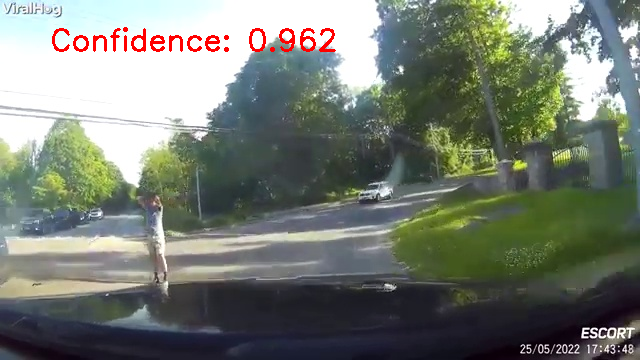

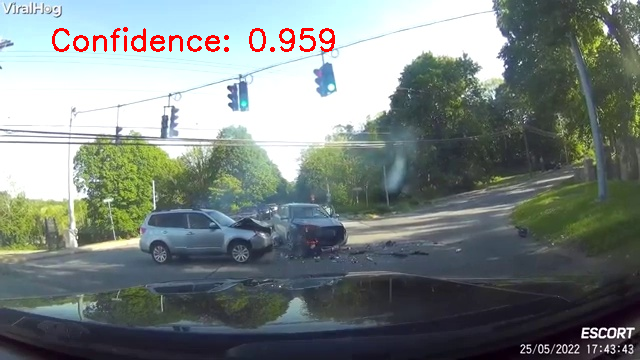

In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Load the trained CNN accident detection model
cnn_model_path = "/content/drive/MyDrive/accident_detection_model.h5"  # Replace with your actual model
cnn_model = load_model(cnn_model_path)

# Path to the video file
video_path = "/content/drive/MyDrive/Accident sample video 3.mp4"

# Create a folder to store frames
output_folder = "processed_frames1"
os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get frames per second
frame_interval = fps  # 1 frame per second

frame_count = 0
top_frames = []  # Initialize variables to store the top two frames with highest confidence

def preprocess_image(image_path):
    """Prepares an image for CNN model prediction"""
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust size as per your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    return img_array

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break  # Exit loop if video ends

    if frame_count % frame_interval == 0:
        # Save the frame temporarily
        frame_filename = f"frame_{frame_count}.jpg"
        frame_path = os.path.join(output_folder, frame_filename)
        cv2.imwrite(frame_path, frame)

        # Step 1: Classify the frame using CNN model
        img_array = preprocess_image(frame_path)
        prediction = cnn_model.predict(img_array)
        accident_prob = prediction[0][0]  # Adjust index based on your model output

        if accident_prob >= 0.8:  # Only consider frames with high confidence
            print(f"🚨 Accident Detected! Frame: {frame_filename} (Confidence: {accident_prob:.2f})")

            # Store the frame with its confidence score
            top_frames.append((frame_path, accident_prob))

            # Keep only the top two frames with the highest confidence
            top_frames = sorted(top_frames, key=lambda x: x[1], reverse=True)[:2]

    frame_count += 1

cap.release()
print("\n✅ Processing completed.")

# Display the top two frames with the highest confidence
for frame, confidence in top_frames:
    # Read the frame and display it with confidence text
    frame_img = cv2.imread(frame)
    cv2.putText(frame_img, f"Confidence: {confidence:.3f}",
                (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # ✅ Use cv2_imshow() instead of cv2.imshow() for Google Colab
    cv2_imshow(frame_img)

# Now top_frames contains the two frames with the highest confidence scores


In [ ]:
from google.colab import drive
import shutil
import os
import time

# Mount Google Drive
drive.mount('/content/drive')

# Define the target folder ID in Google Drive
drive_folder_path = "/content/drive/MyDrive/Sample-ARMS"

# Create the folder if it doesn't exist
os.makedirs(drive_folder_path, exist_ok=True)

# Copy the top two frames to Google Drive with unique names
for i, (frame_path, _) in enumerate(top_frames):
    timestamp = int(time.time())  # Get current timestamp
    unique_name = f"accident_frame_{timestamp}_{i+1}.jpg"  # Generate unique filename
    destination = os.path.join(drive_folder_path, unique_name)
    shutil.copy(frame_path, destination)
    print(f"✅ Saved frame {i+1} to Google Drive: {destination}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved frame 1 to Google Drive: /content/drive/MyDrive/Sample-ARMS/accident_frame_1743308156_1.jpg
✅ Saved frame 2 to Google Drive: /content/drive/MyDrive/Sample-ARMS/accident_frame_1743308156_2.jpg


In [ ]:
!pip install google-generativeai

import google.generativeai as genai

genai.configure(api_key="Your_Gemini_API_Key")


In [ ]:
import google.generativeai as genai

# Configure the API key
genai.configure(api_key="Your_Gemini_API_Key")

# Test the API connection
response = genai.GenerativeModel("gemini-1.5-flash").generate_content("Hello, I am Ashwina")
print(response.text)


Hello Ashwina!  It's nice to meet you. How can I help you today?



In [ ]:
import google.generativeai as genai
import PIL.Image
import os

# Configure Gemini AI with your API Key
genai.configure(api_key="Your_Gemini_API_Key")

# Function to load an image as a PIL object
def load_image(image_path):
    return PIL.Image.open(image_path)

# Define the Google Drive folder where images are stored
drive_folder_path = "/content/drive/MyDrive/Sample-ARMS"

# Get the saved images from Google Drive
top_frame_paths = [os.path.join(drive_folder_path, f) for f in os.listdir(drive_folder_path) if f.endswith(".jpg")]

# Ensure only the latest two frames are used
top_frame_paths = sorted(top_frame_paths, key=os.path.getctime)[-2:]

# Load images as PIL objects
images = [load_image(img_path) for img_path in top_frame_paths]

# Define the prompt for accident analysis
prompt = """
Analyze the provided accident images and summarize the key details in the following format:

1. Accident Severity:(Minor/Moderate/Severe)
2. Possible Injuries: (List possible injuries in a few words)
3. Types of Vehicles Involved:(Sedan, SUV, Bus, etc.)
4. Number of Vehicles Involved: (Give a number)
5. Emergency Responders:(Specify who should arrive at the scene)
6. Other Relevant Information:(Limit to 2 short lines)

Provide only the formatted response without any additional explanations.
"""
# Use Gemini 1.5 Flash model
model = genai.GenerativeModel("gemini-1.5-flash")

# Send the request with images correctly formatted
response = model.generate_content(
    [prompt] + images,  # Passing PIL images directly
    stream=False  # Set stream=True for real-time responses
)

# Print the response
print("📝 Accident Analysis Report:")
print(response.text)


📝 Accident Analysis Report:
1. Accident Severity: Moderate
2. Possible Injuries:  Head injuries, broken bones, cuts, bruises
3. Types of Vehicles Involved: SUV, Sedan
4. Number of Vehicles Involved: 2
5. Emergency Responders: Police, Fire department, Ambulance
6. Other Relevant Information: Intersection collision; potential for fuel leak.  Traffic signal visible.



In [ ]:
import google.generativeai as genai
import json
import PIL.Image
import os
import firebase_admin
from firebase_admin import credentials, db

# Configure Gemini AI with your API Key
genai.configure(api_key="Your_Gemini_API_Key")

# Initialize Firebase (Check if already initialized)
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/drive/MyDrive/ARMS.json")
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://arms-2c9ec-default-rtdb.asia-southeast1.firebasedatabase.app/'
    })

def load_image(image_path):
    return PIL.Image.open(image_path)

def generate_gemini_insights():
    drive_folder_path = "/content/drive/MyDrive/Sample-ARMS"
    top_frame_paths = [os.path.join(drive_folder_path, f) for f in os.listdir(drive_folder_path) if f.endswith(".jpg")]
    top_frame_paths = sorted(top_frame_paths, key=os.path.getctime)[-2:]  # Get latest 2 images
    images = [load_image(img) for img in top_frame_paths]

    prompt = """
    Analyze the provided accident images and summarize the key details in the following format:

    1. Accident Severity:(Minor/Moderate/Severe)
    2. Possible Injuries: (List possible injuries in a few words)
    3. Types of Vehicles Involved:(Sedan, SUV, Bus, etc.)
    4. Number of Vehicles Involved: (Give a number)
    5. Emergency Responders:(Specify who should arrive at the scene)
    6. Other Relevant Information:(Limit to 2 short lines)

    Provide only the formatted response without any additional explanations.
    """

    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content([prompt] + images, stream=False)

    return response.text

def store_accident_report():
    ref = db.reference('gemini_report')
    insights = generate_gemini_insights()

    lines = [line for line in insights.split("\n") if line.strip()]

    accident_data = {
        "severity": lines[0].split(":")[1].strip() if len(lines) > 0 else "Unknown",
        "possible_injuries": [injury.strip() for injury in lines[1].split(":")[1].split(",")] if len(lines) > 1 else [],
        "vehicles_involved": [vehicle.strip() for vehicle in lines[2].split(":")[1].split(",")] if len(lines) > 2 else [],
        "number_of_vehicles": int(lines[3].split(":")[1].strip()) if len(lines) > 3 else 0,
        "emergency_responders": [responder.strip() for responder in lines[4].split(":")[1].split(",")] if len(lines) > 4 else [],
        "other_info": lines[5].split(":")[1].strip() if len(lines) > 5 else "N/A",
        "status": "Pending"  # 🚀 Adding "Pending" status by default
    }

    # ✅ Store in Firebase
    new_report = ref.push(accident_data)
    print(f"🚀 Accident report stored with ID: {new_report.key}")

    # ✅ Save locally as JSON (Fixes NameError)
    with open("gemini_report.json", "w") as json_file:
        json.dump(accident_data, json_file, indent=4)

    print("✅ Report saved locally as 'gemini_report.json'")

def update_status(accident_id, new_status):
    """Updates the status (Accepted/Declined) for a specific accident report."""
    ref = db.reference(f'accident_reports/{accident_id}')
    ref.update({"status": new_status})
    print(f"✅ Status updated for {accident_id}: {new_status}")

# ✅ Run the function to generate insights and store the report
store_accident_report()


🚀 Accident report stored with ID: -OM_Fvo3sWvezVcNMqah
✅ Report saved locally as 'gemini_report.json'


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
import google.generativeai as genai
import PIL.Image
import os
import firebase_admin
from firebase_admin import credentials, db
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

# Configure Gemini AI with API Key
genai.configure(api_key="Your_Gemini_API_Key")

# Firebase Initialization (Check if already initialized)
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/drive/MyDrive/ARMS.json")
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://arms-2c9ec-default-rtdb.asia-southeast1.firebasedatabase.app/'
    })

# Google Drive API Authentication
def authenticate_drive():
    service = build("drive", "v3")
    return service

drive_service = authenticate_drive()

def load_image(image_path):
    return PIL.Image.open(image_path)

def upload_to_drive(file_path, folder_id="1W-U52oNJ7_m-tSUayOKNVpQRhTs9CCNS"):
    """
    Uploads image to Google Drive and returns the shareable link.
    """
    file_metadata = {
        "name": os.path.basename(file_path),
        "parents": [folder_id]  # Upload to a specific folder in Drive
    }
    media = MediaFileUpload(file_path, mimetype="image/jpeg")
    file = drive_service.files().create(body=file_metadata, media_body=media, fields="id").execute()

    # Make the file public
    drive_service.permissions().create(
        fileId=file["id"],
        body={"role": "reader", "type": "anyone"},
    ).execute()

    return f"https://drive.google.com/uc?id={file['id']}"

def generate_gemini_insights():
    drive_folder_path = "/content/drive/MyDrive/Sample-ARMS"
    top_frame_paths = [os.path.join(drive_folder_path, f) for f in os.listdir(drive_folder_path) if f.endswith(".jpg")]
    top_frame_paths = sorted(top_frame_paths, key=os.path.getctime)[-2:]

    # Upload images and get shareable links
    drive_links = [upload_to_drive(img) for img in top_frame_paths]

    images = [load_image(img) for img in top_frame_paths]

    prompt = """
    Analyze the provided accident images and summarize the key details in the following format:

    1. Accident Severity:(Minor/Moderate/Severe)
    2. Possible Injuries: (List possible injuries in a few words)
    3. Types of Vehicles Involved:(Sedan, SUV, Bus, etc.)
    4. Number of Vehicles Involved: (Give a number)
    5. Emergency Responders:(Specify who should arrive at the scene)
    6. Other Relevant Information:(Limit to 2 short lines)

    Provide only the formatted response without any additional explanations.
    """

    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content([prompt] + images, stream=False)

    return response.text, drive_links  # Return insights and image links

def store_accident_report():
    ref = db.reference('accident_reports')
    insights, drive_links = generate_gemini_insights()

    lines = [line for line in insights.split("\n") if line.strip()]

    accident_data = {
        "severity": lines[0].split(":")[1].strip() if len(lines) > 0 else "Unknown",
        "possible_injuries": [injury.strip() for injury in lines[1].split(":")[1].split(",")] if len(lines) > 1 else [],
        "vehicles_involved": [vehicle.strip() for vehicle in lines[2].split(":")[1].split(",")] if len(lines) > 2 else [],
        "number_of_vehicles": int(lines[3].split(":")[1].strip()) if len(lines) > 3 else 0,
        "emergency_responders": [responder.strip() for responder in lines[4].split(":")[1].split(",")] if len(lines) > 4 else [],
        "other_info": lines[5].split(":")[1].strip() if len(lines) > 5 else "N/A",
        "image_links": drive_links  # Store image links in Firebase
    }

    new_report = ref.push(accident_data)
    accident_id = new_report.key  # Store the accident ID in a variable

    print(f"🚀 Accident report stored with ID: {accident_id}")

    return accident_id  # Return the Accident ID if needed

# Run the function and store accident ID
accident_id = store_accident_report()
print(f"Stored Accident ID: {accident_id}")


🚀 Accident report stored with ID: -OM_G0kXzEyTSc1_WWUy
Stored Accident ID: -OM_G0kXzEyTSc1_WWUy


In [ ]:
!pip install flask pyngrok



In [ ]:
from pyngrok import ngrok

!ngrok config add-authtoken 2t5QwLIjxS5xhsCskVQDyInKpjh_7pZ6mgHz4Sc4qosdp1Jnz

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
public_url = ngrok.connect(5000).public_url
print(f"🚀 Ngrok Tunnel: {public_url}")


🚀 Ngrok Tunnel: https://35f3-34-105-94-135.ngrok-free.app


In [ ]:
from flask import Flask, jsonify
from pyngrok import ngrok
import json

app = Flask(__name__)

# Load the Gemini AI Report
def load_gemini_report():
    report_path = "/content/gemini_report.json"  # Update this path if needed
    try:
        with open(report_path, "r") as file:
            data = json.load(file)
        return data
    except Exception as e:
        return {"error": f"Failed to load report: {str(e)}"}

# API Endpoint to serve the Gemini report
@app.route('/get_gemini_report', methods=['GET'])
def get_gemini_report():
    report = load_gemini_report()
    return jsonify(report)

# Start the Flask App
if __name__ == '__main__':
    public_url = ngrok.connect(5000).public_url  # Open a public URL using ngrok
    print(f"🚀 API is live at: {public_url}/get_gemini_report")  # Print the public URL
    app.run(port=5000)



🚀 API is live at: https://c8f4-34-105-94-135.ngrok-free.app/get_gemini_report
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import json
import os
import base64
from flask import Flask, render_template_string, send_file
from pyngrok import ngrok

report_path = "/content/gemini_report.json"
roi_folder = "/content/drive/MyDrive/Sample-ARMS"

def get_roi_images():
    if not os.path.exists(roi_folder):
        return []

    images = [f for f in os.listdir(roi_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    images = images[:2]

    encoded_images = []
    for img in images:
        img_path = os.path.join(roi_folder, img)
        with open(img_path, "rb") as file:
            encoded_images.append(base64.b64encode(file.read()).decode('utf-8'))

    return encoded_images

app = Flask(__name__)

@app.route("/get_gemini_report")
def get_gemini_report():
    return send_file(report_path, mimetype="application/json")

@app.route("/get_roi_images")
def get_roi_images_route():
    return json.dumps(get_roi_images())

html_template ="""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Accident Detection Dashboard</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/html2canvas/1.4.1/html2canvas.min.js"></script>
    <!-- Firebase SDK -->
    <script src="https://www.gstatic.com/firebasejs/10.7.2/firebase-app.js"></script>
    <script src="https://www.gstatic.com/firebasejs/10.7.2/firebase-storage.js"></script>
    <script src="https://www.gstatic.com/firebasejs/10.7.2/firebase-database.js"></script>


    <style>
      body { background-color: #121212; color: white; font-family: Arial, sans-serif; text-align: center; margin: 0; padding-top: 60px; }
      .container { max-width: 1100px; margin: auto; background: #1e1e1e; padding: 20px; border-radius: 10px; position: relative;margin-top: 30px; }
      .container::before { content: ""; position: absolute; top: -5px; left: -5px; right: -5px; bottom: -5px; background: linear-gradient(45deg, red, transparent); border-radius: 15px; z-index: -1; box-shadow: 0 0 20px red; }
      .title { color: #ff4444; text-shadow: 0 0 10px red; }
      .insight-box { border:; padding: 15px; border-radius: 10px; margin-top: 10px; background: #2a2a2a; width: 48%; text-align: left; }
      .roi-container { display: flex; justify-content: space-between; align-items: flex-start; margin-top: 20px; position: relative; }
      .roi-image { width: 48%; border:; border-radius: 10px; }
      .btn-container { display: flex; justify-content: center; gap: 15px; margin-top: 15px; }
      .btn-custom { padding: 10px 20px; border: none; cursor: pointer; border-radius: 5px; font-weight: bold; font-size: 14px; }
      .btn-accept { background-color: green; color: white; margin-right: 10px; }
      .btn-decline { background-color: red; color: white; }
      .navbar { width: 100%; position: fixed; top: 0; left: 0; height: 50px; background: rgba(0, 0, 0, 0.7); color: white; display: flex; align-items: center; padding: 0 20px; font-size: 18px; font-weight: bold; box-shadow: 0px 2px 5px red; justify-content: space-between; }
      .menu-icon { cursor: pointer; font-size: 24px; }
      .sidebar { position: fixed; top: 0; right: -300px; width: 300px; height: 100vh; background: #1e1e1e; box-shadow: -5px 0px 10px rgba(255, 0, 0, 0.5); transition: 0.3s; padding: 20px; overflow-y: auto; z-index: 1000; }
      .sidebar.active { right: 0; }
      .sidebar .close-btn { position: absolute; top: 10px; right: 15px; font-size: 24px; cursor: pointer; color: red; }
      .history-item { border-bottom: 1px solid red; padding: 10px; color: white; text-align: left; }
      .accept-decline-container { position: absolute; top: 70%; left: 55%; transform: translate(-50%, -50%); text-align: center; }
      .accept-decline-container p { color: white; font-size: 18px; font-weight: bold; margin-bottom: 5px; }
      .accept-decline-container .btn-accept { background-color: green; color: white; padding: 10px 20px; border: none; display: block; margin-bottom: 5px; cursor: pointer; transition: 0.3s; }
      .accept-decline-container .btn-accept:hover { background-color: limegreen; }
      .accept-decline-container .btn-decline { background-color: red; color: white; padding: 10px 20px; border: none; display: block; cursor: pointer; transition: 0.3s; }
      .accept-decline-container .btn-decline:hover { background-color: darkred; }
      .accident-report-btn { background: linear-gradient(45deg, red, darkred); color: white; padding: 12px 25px; font-size: 18px; font-weight: bold; border: none; cursor: pointer; border-radius: 8px; box-shadow: 0 0 10px rgba(255, 0, 0, 0.8); transition: 0.3s; }
      .accident-report-btn:hover { background: linear-gradient(45deg, darkred, black); box-shadow: 0 0 15px rgba(255, 0, 0, 1); transform: scale(1.05); }
      .status-box { position: absolute; top: 20px; right: 20px; padding: 10px 15px; font-weight: bold; border-radius: 8px; font-size: 16px; box-shadow: 0 0 10px yellow; background: orange; color: black; }
      .status-box.accepted { background: green; color: white; box-shadow: 0 0 10px green; }
      .status-box.declined { background: red; color: white; box-shadow: 0 0 10px red; }

    </style>
</head>
<body>
        <div class="navbar">
        <span>ACCIDENT DETECTION & EMERGENCY RESPONSE SYSTEM</span>
        <span class="menu-icon" onclick="toggleSidebar()">☰</span>
    </div>

    <div class="sidebar" id="sidebar">
        <span class="close-btn" onclick="toggleSidebar()">✖</span>
        <h3>📜 Accident History</h3>
        <div id="history-list"></div>
    </div>

    <div class="container">
        <div class="status-box">Status: <span id="status">Pending Approval</span></div>
        <h2 class="title">🚨 Accident Detected 🚨</h2>
        <div class="roi-container">
            <img id="roi_img_1" class="roi-image" src="" alt="ROI Image 1">
            <img id="roi_img_2" class="roi-image" src="" alt="ROI Image 2">
        </div>
        <div class="insight-box">
            <div><strong>Severity:</strong> <span id="severity"></span></div>
            <div><strong>Possible Injuries:</strong> <span id="possible_injuries"></span></div>
            <div><strong>Vehicles Involved:</strong> <span id="vehicles_involved"></span></div>
            <div><strong>Number of Vehicles:</strong> <span id="number_of_vehicles"></span></div>
            <div><strong>Emergency Responders:</strong> <span id="emergency_responders"></span></div>
            <div><strong>Other Info:</strong> <span id="other_info"></span></div>

        </div>
        <div class="btn-container">
            <button onclick="captureScreenshot('Accepted')" class="btn-custom btn-accept">Accept</button>
            <button onclick="captureScreenshot('False Alarm')" class="btn-custom btn-decline">Decline</button>
        </div>
    </div>

    <script>
        document.addEventListener("DOMContentLoaded", function () {
            fetch('/get_gemini_report')
                .then(response => response.json())
                .then(data => {
                    document.getElementById('severity').textContent = data.severity || "Unknown";
                    document.getElementById('possible_injuries').textContent = data.possible_injuries?.join(", ") || "Unknown";
                    document.getElementById('vehicles_involved').textContent = data.vehicles_involved?.join(", ") || "Unknown";
                    document.getElementById('number_of_vehicles').textContent = data.number_of_vehicles || "Unknown";
                    document.getElementById('emergency_responders').textContent = data.emergency_responders?.join(", ") || "Unknown";
                    document.getElementById('other_info').textContent = data.other_info || "No additional info";
                });

            fetch('/get_roi_images')
                .then(response => response.json())
                .then(images => {
                    if (images.length > 0) { document.getElementById('roi_img_1').src = `data:image/jpeg;base64,${images[0]}`; }
                    if (images.length > 1) { document.getElementById('roi_img_2').src = `data:image/jpeg;base64,${images[1]}`; }
                })
                .catch(error => console.error('Error loading images:', error));

            loadAccidentHistory();
        });

        function toggleSidebar() {
            document.getElementById('sidebar').classList.toggle('active');
        }

        function captureScreenshot(status) {
            document.getElementById('status').textContent = status;

            html2canvas(document.body).then(canvas => {
                let imageData = canvas.toDataURL("image/png"); // Convert to Base64
                let timestamp = new Date().toLocaleString();

                // Save to localStorage
                let history = JSON.parse(localStorage.getItem("accidentHistory")) || [];
                history.push({ timestamp, status, imageData });
                localStorage.setItem("accidentHistory", JSON.stringify(history));

                // Add to sidebar
                addHistoryButton(timestamp, status, imageData);
            });
        }

        function addHistoryButton(timestamp, status, imageData) {
            let btn = document.createElement("button");
            btn.textContent = `${timestamp} - ${status}`;
            btn.classList.add("history-btn");

            // On click, open image in new tab
            btn.addEventListener("click", () => {
                let newTab = window.open();
                newTab.document.write(`<h2>Accident Report</h2><img src="${imageData}" width="100%"><p>Status: ${status}</p>`);
            });

            document.getElementById("history-list").appendChild(btn);
        }

        function loadAccidentHistory() {
            let history = JSON.parse(localStorage.getItem("accidentHistory")) || [];
            history.forEach(({ timestamp, status, imageData }) => {
                addHistoryButton(timestamp, status, imageData);
            });
        }

        function updateStatus(status) {
            const statusBox = document.querySelector('.status-box');
            statusBox.textContent = `Status: ${status}`;

            // Remove previous status classes
            statusBox.classList.remove('pending', 'accepted', 'declined');

            // Apply the new status class
            if (status === 'Accepted') {
                statusBox.classList.add('accepted');
            } else if (status === 'Declined') {
                statusBox.classList.add('declined');
            } else {
                statusBox.classList.add('pending');  // Default to pending
            }
        }
    </script>
</body>
</html>

"""

@app.route("/")
def dashboard():
    return render_template_string(html_template)

if __name__ == "__main__":
    public_url = ngrok.connect(5000).public_url
    print(f"Dashboard is live at: {public_url}")
    app.run(port=5000)


Dashboard is live at: https://86bb-34-105-94-135.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [30/Mar/2025 04:49:44] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Mar/2025 04:49:44] "GET /get_gemini_report HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Mar/2025 04:49:44] "GET /get_roi_images HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Mar/2025 04:49:44] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
!pip install twilio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.4 MB/s eta 0:00:00


In [ ]:
roi_frame_url = "https://drive.google.com/file/d/1W-U52oNJ7_m-tSUayOKNVpQRhTs9CCNS/view?usp=sharing"


In [ ]:
from twilio.rest import Client

# Your Twilio credentials
account_sid = 'Your_Twilio_API_Key'
auth_token = 'Your_twilio_authtoken'
from_number = '+19895463547'
to_number = '+91 9176125008'

# URL for the ROI image (Google Drive or other URL)
roi_image_url = 'https://drive.google.com/uc?id=1W-U52oNJ7_m-tSUayOKNVpQRhTs9CCNS'  # Replace with your actual image URL

# Message content with dynamic insertion of the ROI image URL
message = f'''
Accident Severity: Moderate
Possible Injuries: Lacerations, broken bones, whiplash
Types of Vehicles Involved: SUV, Sedan
Number of Vehicles Involved: 2
Emergency Responders: Police, Fire department, EMS
Other Relevant Information: Intersection collision; potential for fuel leak. Appears to be a t-bone collision.

ROI Frame: {roi_image_url}
'''

# Initialize Twilio client
client = Client(account_sid, auth_token)

# Send the SMS
message_sent = client.messages.create(
    body=message,  # The message content
    from_=from_number,  # Your Twilio phone number
    to=to_number  # Recipient's phone number
)

# Output message SID for confirmation
print(f"Message SID: {message_sent.sid}")


Message SID: SMf882921e1c07d39c6bab7f578eefe900


In [ ]:
from twilio.rest import Client

# Your Twilio credentials
account_sid = 'Your_Twilio_API_Key'
auth_token = 'Your_twilio_token'
from_number = '+19895463547'
to_number = '112'  # The phone number to call emergency helpline number

# The content to be read out
message = '''
Accident Severity: Moderate.
Possible Injuries: Lacerations, broken bones, whiplash.
Types of Vehicles Involved: SUV, Sedan.
Number of Vehicles Involved: 2.
Emergency Responders: Police, Fire department, EMS.
Other Relevant Information: Intersection collision; potential for fuel leak. Appears to be a t-bone collision.
'''

# Initialize Twilio client
client = Client(account_sid, auth_token)

# Make the call and read out the message
call = client.calls.create(
    to=to_number,  # Recipient's phone number
    from_=from_number,  # Your Twilio phone number
    twiml=f'<Response><Say>This is the SMS from the ARMS team check the SMS</Say></Response>'  # Twilio's TTS (Text-to-Speech)
)

# Output the call SID for confirmation
print(f"Call SID: {call.sid}")


Call SID: CAfe154c631562b5b9b65c28f8d74bcf81
